# Problem Statement - E-news Express Project

### **Problem Statements**

**Context**

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express believe that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

**Objective**

The design team of the company has researched and created a new landing page that has a new outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?

**Data Dictionary**

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* **user_id** - Unique user ID of the person visiting the website

* **group** - Whether the user belongs to the first group (control) or the second group (treatment)

* **landing_page** - Whether the landing page is new or old

* **time_spent_on_the_page** - Time (in minutes) spent by the user on the landing page

* **converted** - Whether the user gets converted to a subscriber of the news portal or not

* **language_preferred** - language chosen by the user to view the landing page

## **Importing the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
from scipy.stats import t
import scipy.stats as stats

## **Loading the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
file_path = r"/content/drive/MyDrive/abtest.csv"
df = pd.read_csv(file_path)

#### **Displaying the first few rows of the dataset**

In [4]:
# view the first 5 rows
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


#### **Checking the shape of the dataset**

In [5]:
# Checking how many rows and columns are present in the data
df.shape

(100, 6)

##### Observations:
* There are `100 rows` & `6 columns` in the abtest dataset.

#### **Checking the data types of the columns for the dataset**

In [6]:
# inspecting the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


##### Observations:
* The `user_id`, and `time_spent_on_the_page` columns are numeric columns while, `group`, `landing_page`, `converted` and `language_preferred`.

* The `time_spent_on_the_page` columns are continous in nature.

* All the columns have `100 observations`, which means none of the columns has `null values`.

#### **Statistical summary of the dataset**

In [7]:
# Checking the statistical summary of the
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


##### Observations:
* The **minimum**, **average**, and **maximum** `time_spent_on_the_page` are *0.19 minutes*, *5.38 minutes* and *10.71 minutes* respectively.

#### **Checking for null values**

In [8]:
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


##### Observations:
* As we can see, all the columns has `0 missing values`. It means, there are no missing values in the data.

## **Exploratory Data Analysis (EDA)**

### Univariate Analysis

#### Distribution of **`time_spent_on_the_page`** *(Numerical Column)*

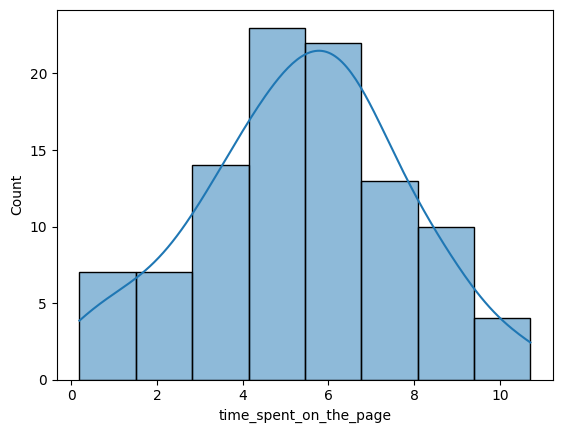

In [9]:
sns.histplot(df, x='time_spent_on_the_page', kde=True);

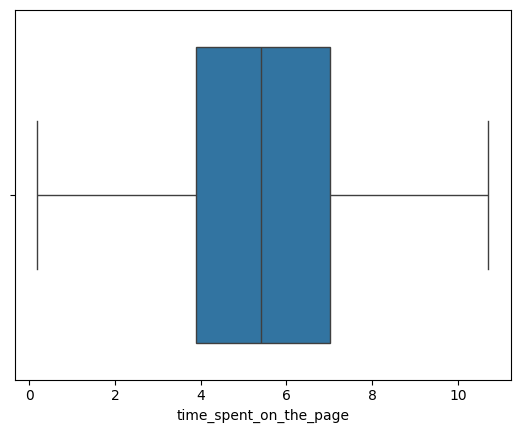

In [10]:
sns.boxplot(df, x='time_spent_on_the_page');

##### Observations:
* The `time_spent_on_the_page` distribution look like evenly distribution with no outlier.
* The median of `time_spent_on_the_page` is nearly 5 minutes.

#### Distribution of **`group`** *(Categorical Column)*

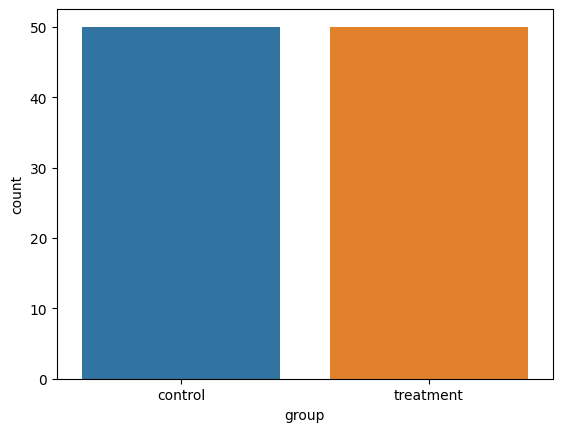

In [11]:
sns.countplot(df, x='group', hue='group');

##### Observations:
* The number of users are equal in both `control group` and `treatment group` in the given dataset.
* `The existing landing page` was served to the first group (**`control group`**) and `the new landing page` to the second group (**`treatment group`**).

#### Distribution of **`landing_page`** *(Categorical Column)*

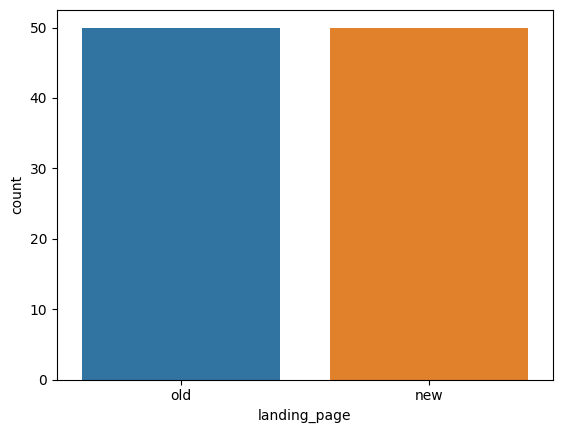

In [12]:
sns.countplot(df, x='landing_page', hue='landing_page');

##### Observations:
* The number of users are equal in both `old landing_page` and `new landing_page` in the given dataset.
* Total number of users are 100 (50 belongs to old landing_page, 50 belongs to new landing_page).

#### Distribution of **`converted`** *(Categorical Column)*

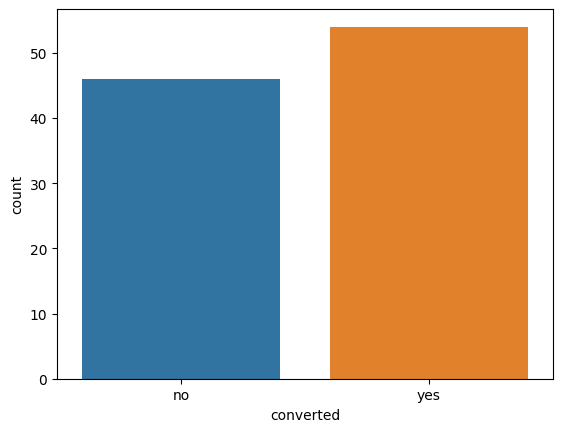

In [13]:
sns.countplot(df, x='converted', hue='converted');

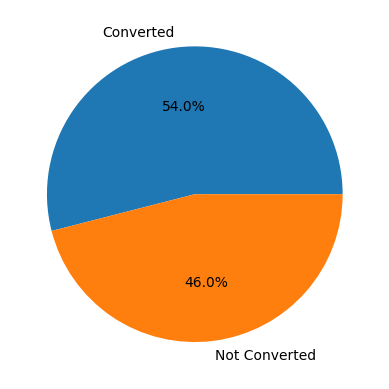

In [14]:
plt.pie(df['converted'].value_counts(), labels=['Converted', 'Not Converted'], autopct='%1.1f%%');

##### Observations:
* The number of users gets `converted` to a subscriber **more than** `Not Converted` the news portal.
* About `54%` of the users get `converted` the news portal.

#### Distribution of **`language_preferred`** *(Categorical Column)*

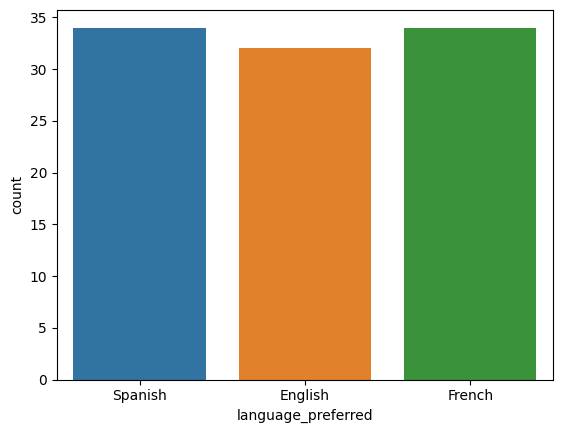

In [15]:
sns.countplot(df, x='language_preferred', hue='language_preferred');

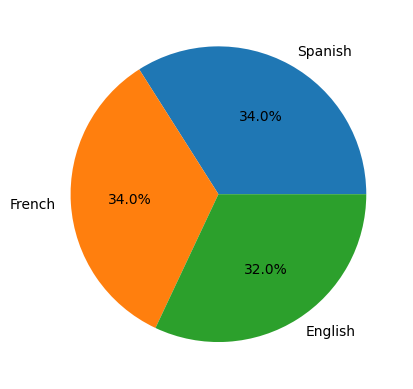

In [16]:
plt.pie(df['language_preferred'].value_counts(), labels=['Spanish', 'French', 'English'], autopct='%1.1f%%');

In [17]:
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


##### Observations:
* Users prefered to view the landing page in `Spanish` and `French` followed by `English`.
* The number of users viewing the landing page in `Spanish` and `French` is the same, with both languages having 34 users in the dataset.
* Approximately, 34% of the users preferred `Spanish`,  34% preferred `French` and 32% preferred `English` language.

### Bivariate analysis

#### Distribution of **`group`** vs **`landing_page`** *(Categorical Column & Categorical column)*

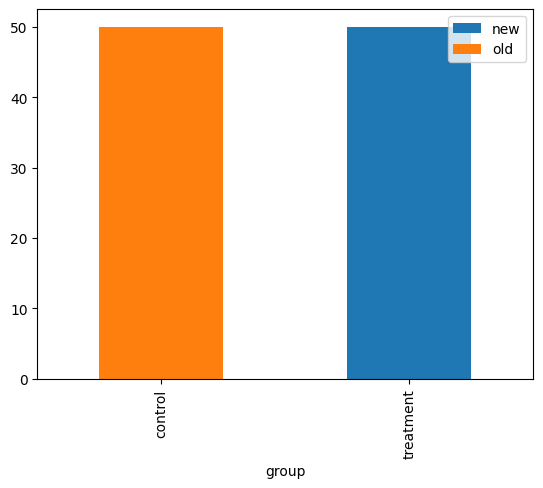

In [18]:
pd.crosstab(df['group'], df['landing_page']).plot.bar(stacked = True)
plt.legend(loc='upper right');

##### Observations:
* The number of users is equal for both the `new landing page` and the `old landing page`.
* The total number of observations are 100, with **`50`** belonging to the `old landing page` & remaining **`50`** to the `new landing page`.

#### Distribution of **`group`** vs **`time_spent_on_the_page`** *(Categorical column & Numerical Column)*

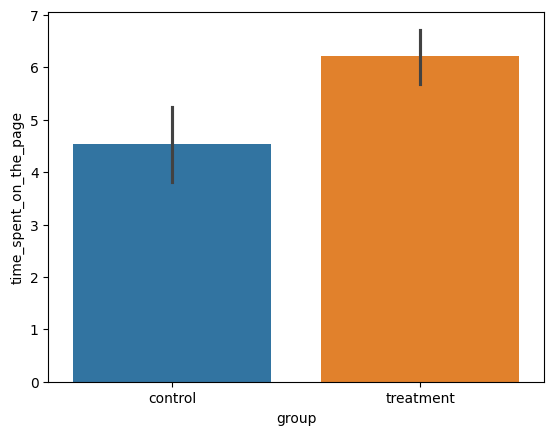

In [19]:
sns.barplot(df, x='group', y='time_spent_on_the_page', hue='group');

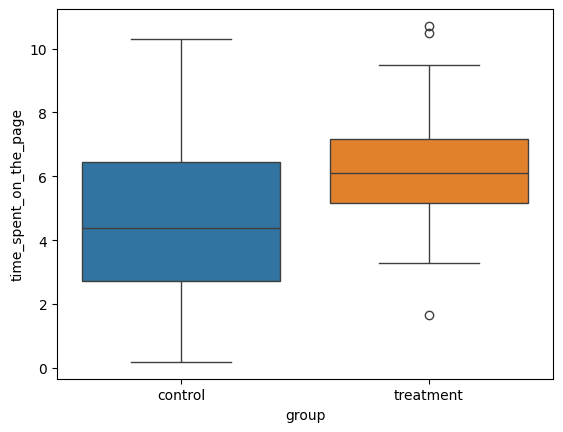

In [20]:
sns.boxplot(data=df, x='group', y='time_spent_on_the_page', hue='group');

##### Observations:
* Users spent **more time** on  the `new landing page` compared to the `old landing page`.
* There is a few outliers in the `new landing page`.

#### Distribution of **`group`** vs **`converted`** *(Categorical Column & Categorical column)*

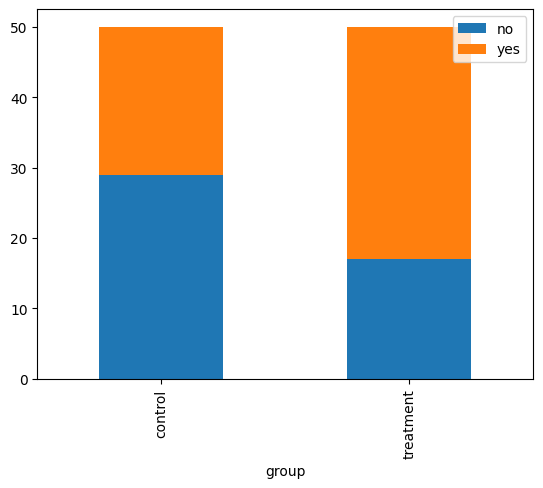

In [21]:
pd.crosstab(df['group'], df['converted']).plot.bar(stacked = True)
plt.legend(loc='upper right');

##### Observations:
* As observed, **more** users are converting on the `new landing page` compared to the `old landing page`.

#### Distribution of **`group`** vs **`language_preferred`** *(Categorical Column & Categorical column)*

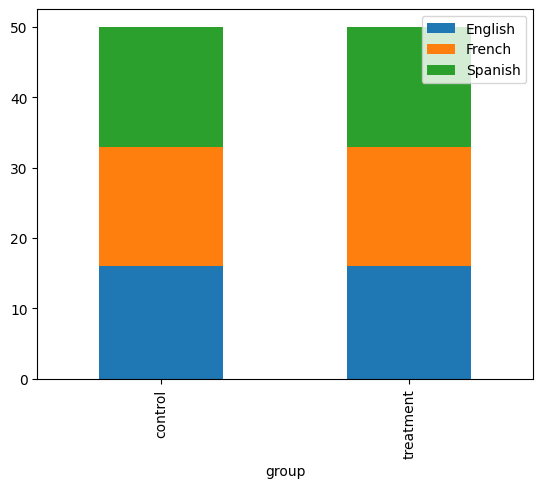

In [22]:
pd.crosstab(df['group'], df['language_preferred']).plot.bar(stacked = True)
plt.legend(loc='upper right');

##### Observations:
* As observed, the values are the same for both the `old landing page` & `new landing page` across all languages (Spanish, French & English).

#### Distribution of **`landing_page`** vs **`time_spent_on_the_page`** *(Categorical column & Numerical Column)*

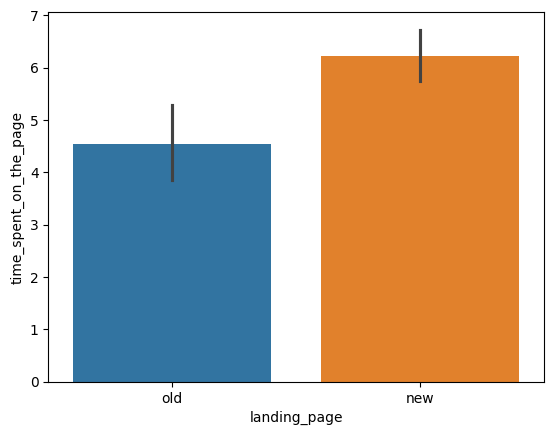

In [23]:
sns.barplot(df, x='landing_page', y='time_spent_on_the_page', hue='landing_page');

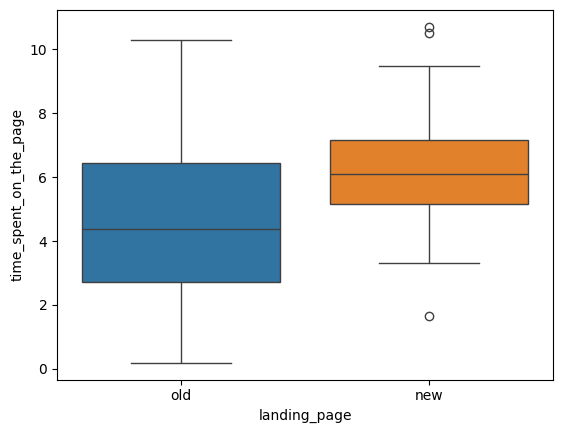

In [24]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='landing_page');

##### Observations:
* Users spent more time on the `new landing page` compared to the `old landing page`.

#### Distribution of **`landing_page`** vs **`converted`** *(Categorical Column & Categorical column)*

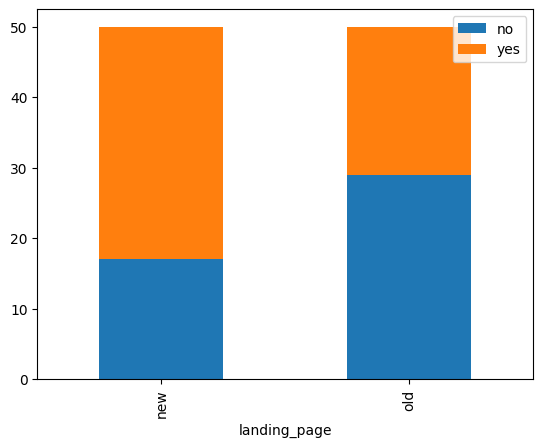

In [25]:
pd.crosstab(df['landing_page'], df['converted']).plot.bar(stacked = True)
plt.legend(loc='upper right');

##### Observations:
* As observed, **more** users are converting on the `new landing page` compared to the `old landing page`.

#### Distribution of **`landing_page`** vs **`language_preferred`** *(Categorical Column & Categorical column)*

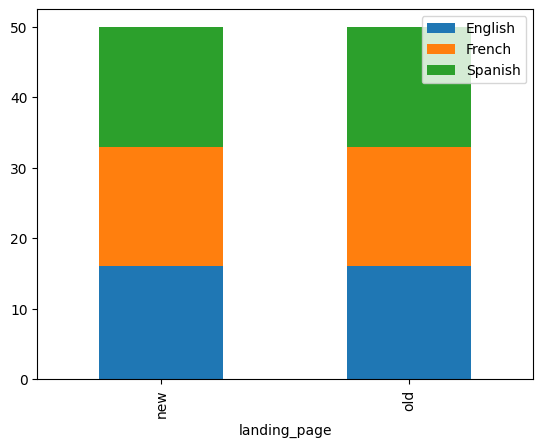

In [26]:
pd.crosstab(df['landing_page'], df['language_preferred']).plot.bar(stacked = True)
plt.legend(loc='upper right');

##### Observations:
* As observed, there is no relationship between the `landing_page` and the `language_preferred` columns.

#### Distribution of **`time_spent_on_the_page`** vs **`converted`** *( Numerical Column Categorical column)*

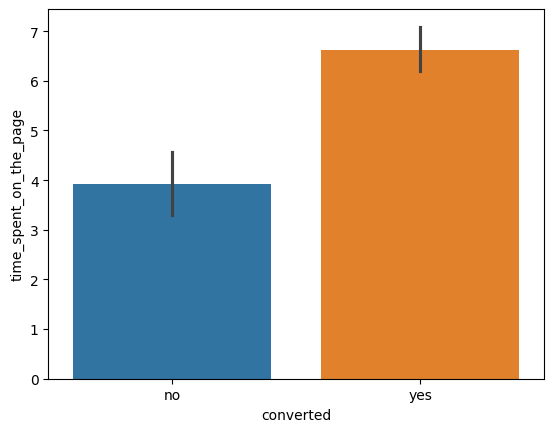

In [27]:
sns.barplot(df, x ='converted', y='time_spent_on_the_page', hue='converted');

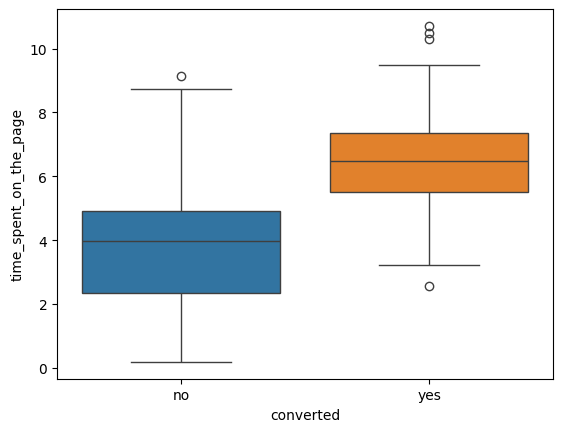

In [28]:
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', hue='converted');

##### Observations:
* As observed, users spent more time on the `new landing page` and **converted at a higher rate** compared to the `old landing page`.

#### Distribution of **`time_spent_on_the_page`** vs **`language_preferred`** *( Numerical Column Categorical column)*

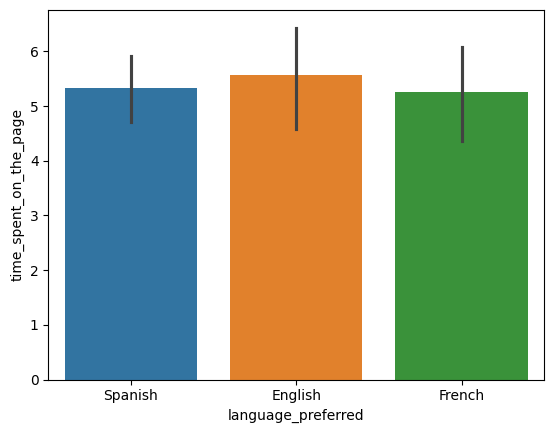

In [29]:
sns.barplot(df, x ='language_preferred', y='time_spent_on_the_page', hue='language_preferred');

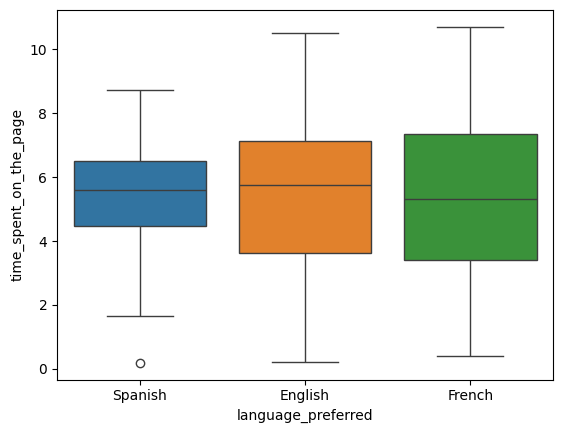

In [30]:
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='language_preferred');

##### Observations:
* The medians are nearly identical across all the languages.

#### Distribution of **`converted`** vs **`language_preferred`** *(Categorical Column & Categorical column)*

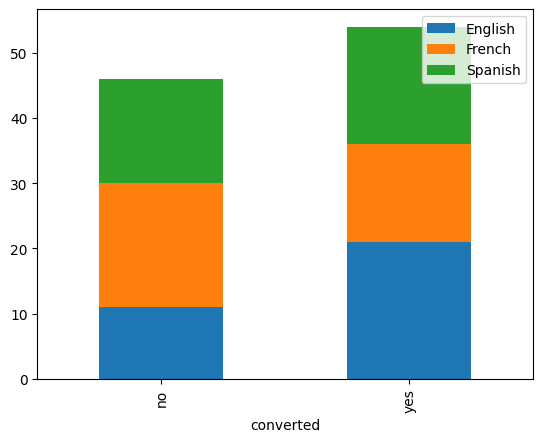

In [31]:
pd.crosstab(df['converted'], df['language_preferred']).plot.bar(stacked = True)
plt.legend(loc='upper right');

##### Observations:
* It appears that there `may be` `no relationship` between the `converted` and `language_preferred` columns.

## **Questions**

In [32]:
# level of significance = 5%  given for the statistical analysis
alpha = 0.05

#### **Q1 Do the users spend more time on the new landing page than on the existing landing page?**

##### Visual Analysis

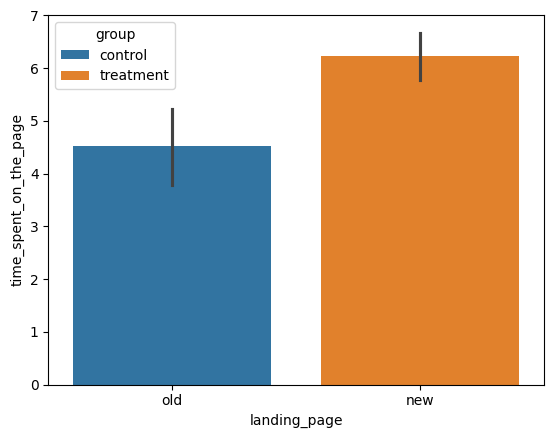

In [33]:
sns.barplot(df, x='landing_page', y='time_spent_on_the_page', hue='group');

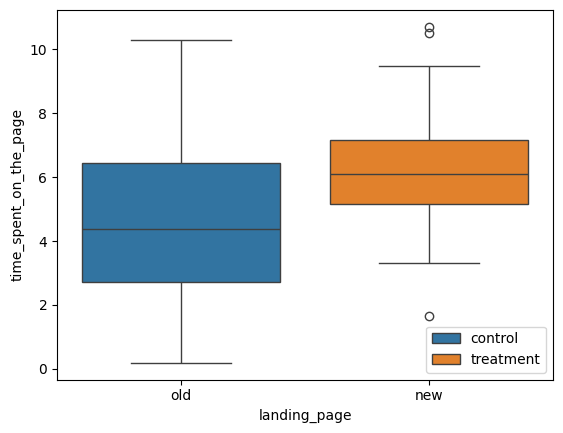

In [34]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', hue='group')
plt.legend(loc='lower right');

###### Observations:
* According to the graph, users spent more time on the new landing page compared to the old landing page.

##### Hypothesis Analysis

###### **Step1:** Formulate the null & alternate hypothesis based on above question:

* μ1 or mu1 = Mean time spent by users on the old page
* μ2 or mu2 = Mean time spent by users on the new page

* `Null Hypothesis H0`: **μ1 = μ2**
* `Alternate Hypothesis Ha`: **μ1 < μ2**

In [35]:
time_spent_for_old_page = df[df['landing_page'] == 'old']['time_spent_on_the_page']
time_spent_for_new_page = df[df['landing_page'] == 'new']['time_spent_on_the_page']

###### **Step 2:** Select the appropiate test

Assumptions:

* The `time_spent_on_the_page` column is `continuous data`,
* Normally distributed population
* Two independent populations
* `standard deviations` are `unknown`
* Random sampling from the population

We'll use => **`2_sample_independent_t_test`**

* Equation or Formula: **stats.ttest_ind(sample1, sample2, alternative)**

###### **Step3:** Calculate the p-value

In [36]:
test_statistic, p_value = stats.ttest_ind(time_spent_for_old_page, time_spent_for_new_page, alternative='less')
print('test_statistic:', test_statistic)
print('p-value:', p_value)

test_statistic: -3.7867702694199856
p-value: 0.0001316123528095005


###### **Step4:** Inference based on the p-value

In [37]:
if p_value < 0.05:
    print(f'As the p-value {round(p_value,5)} is less than the level of significance({alpha}), we reject the null hypothesis.')
else:
    print(f'As the p-value {round(p_value,5)} is greater than the level of significance({alpha}), we fail to reject the null hypothesis.')

As the p-value 0.00013 is less than the level of significance(0.05), we reject the null hypothesis.


Observations:

* At a 5% of significance level, we **`reject the null hypothesis`**. Hence, we have **enough statistical evidence** to say that the users spend **`more time`** on `the new landing page` **`than`** on `the existing landing page`.

#### **Q2 Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

##### Visual Analysis

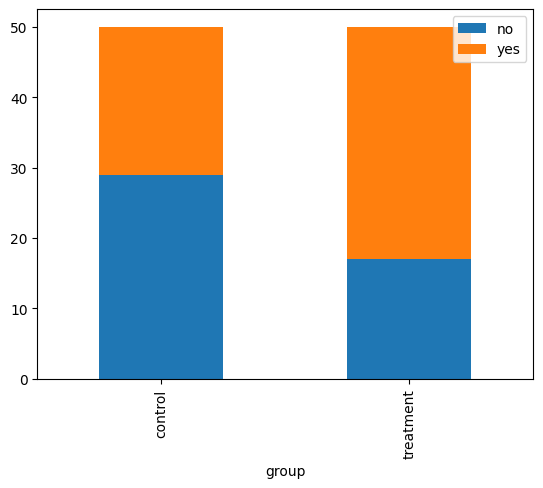

In [38]:
pd.crosstab(df['group'], df['converted']).plot.bar(stacked = True)
plt.legend(loc='upper right');

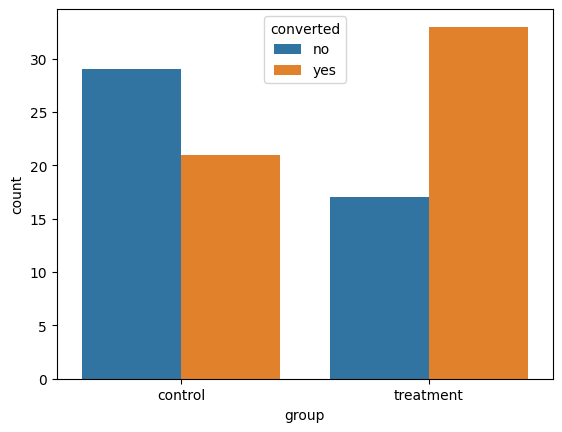

In [39]:
sns.countplot(df, x='group', hue='converted');

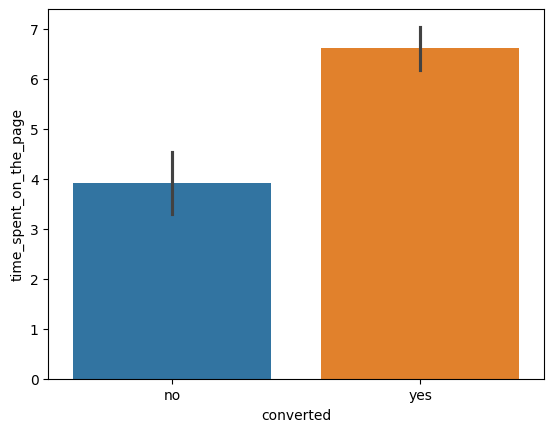

In [40]:
sns.barplot(df, x ='converted', y='time_spent_on_the_page', hue='converted');

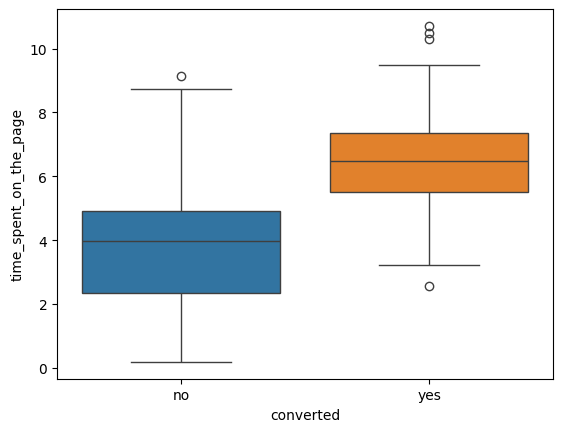

In [41]:
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', hue='converted');

Observations:

* As observed, **more** users are converting on the `new landing page` compared to the `old landing page`.
* According to the graph, users spent more time on the `new landing page` and **converted at a higher rate** compared to the `old landing page`.

##### Hypothesis Analysis

###### **Step1:** Formulate the null & alternate hypothesis based on above question:

* p1: is the proportion of users who visits the old landing page & get converted
* p2: is the proportion of users who visits the new landing page & get converted

* `Null Hypothesis H0`: **p1 = p2**
* `Alternate Hypothesis Ha`: **p1 < p2**

###### **Step 2:** Select the appropiate test

Assumptions:
* There are only two possible outcomes (converted or not-converted)
* Random sampling from the populations.
* Compare the sample `proportions` from `two populations`.

We'll use => **`2_proportion_sample_z_test`**

In [42]:
old_converted_count = len(df.loc[(df['landing_page'] == 'old') & (df['converted'] == 'yes')])
new_converted_count = len(df.loc[(df['landing_page'] == 'new') & (df['converted'] == 'yes')])

print('old_converted_count:', old_converted_count)
print('new_converted_count:', new_converted_count)

old_converted_count: 21
new_converted_count: 33


In [43]:
converted_count = np.array([old_converted_count, new_converted_count])
total_sample = np.array([50, 50])

###### **Step3:** Calculate the p-value

In [44]:
from statsmodels.stats.proportion import proportions_ztest
test_statistics, p_value = proportions_ztest(converted_count, total_sample)
print('test_statistics:', test_statistics)
print('p-value:', p_value)

test_statistics: -2.4077170617153842
p-value: 0.016052616408112556


###### **Step4:** Inference based on the p-value

In [45]:
if p_value < 0.05:
    print(f'As the p-value {round(p_value,3)} is less than the level of significance({alpha}), we reject the null hypothesis.')
else:
    print(f'As the p-value {round(p_value,3)} is greater than the level of significance({alpha}), we fail to reject the null hypothesis.')

As the p-value 0.016 is less than the level of significance(0.05), we reject the null hypothesis.


Observations:

* At a 5% of significance level, we **`reject the null hypothesis`**. Hence, we have **enough statistical evidence** to say that the `proportion` of users who visit the `new landing page` and `get convert` is **greater than** the conversion rate for the `old landing page`.

#### **Q3 Does the converted status depend on the preferred language?**

##### Visual Analysis

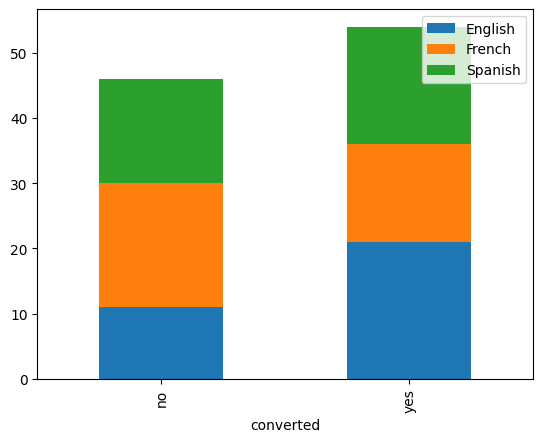

In [46]:
pd.crosstab(df['converted'], df['language_preferred']).plot.bar(stacked = True)
plt.legend(loc='upper right');

###### Observations:
* It appears that there `may be` `no relationship` between the `converted` and `language_preferred` columns.

##### Hypothesis Analysis

###### **Step1:** Formulate the null & alternate hypothesis based on above question:

* `Null Hypothesis H0`: **User Converted status and Preferred language are independent**
* `Alternate Hypothesis Ha`: **User Converted status and Preferred language are dependent**

###### **Step 2:** Select the appropiate test
Assumptions:
* We have two categorical variables i.e. `Converted` status and `language_preferred`.
* Random sampling from the population.
* Expected value of the number of sample observations in each level of the varibale is atleast 5.

We'll use => **Chi_square_test of independence.**

formula is: **stats.`chi2_contingency`(`contingency_table`)**

* To perform the Chi-squared test of independance we need to create the contingency table.
* A contingency table is a tabular representation of categorical data.
* The pandas crosstab() function is used to create a contingency table.

In [47]:
contingency_table = pd.crosstab(df['converted'], df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


###### **Step3:** Calculate the p-value

In [48]:
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print('chi2_statistic', chi2_statistic)
print('p_value', p_value)

chi2_statistic 3.0930306905370837
p_value 0.21298887487543447


###### **Step4:** Inference based on the p-value

In [49]:
if p_value < 0.05:
    print(f'As the p-value {round(p_value,3)} is less than the level of significance({alpha}), we reject the null hypothesis.')
else:
    print(f'As the p-value {round(p_value,3)} is greater than the level of significance({alpha}), we fail to reject the null hypothesis.')

As the p-value 0.213 is greater than the level of significance(0.05), we fail to reject the null hypothesis.


Observations:

* At a 5% of significance level, we **`fail to reject the null hypothesis`**. Hence, we **do not have enough statistical evidence** to say that Converted status and Preferred language are independent.

#### **Q4 Is the time spent on the new page the same for the different language users?**

##### Visual Analysis

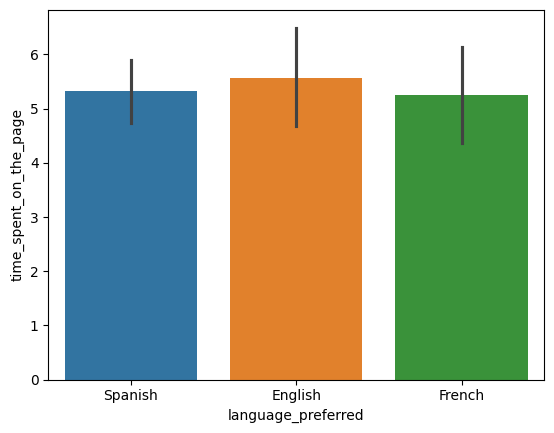

In [50]:
sns.barplot(df, x ='language_preferred', y='time_spent_on_the_page', hue='language_preferred');

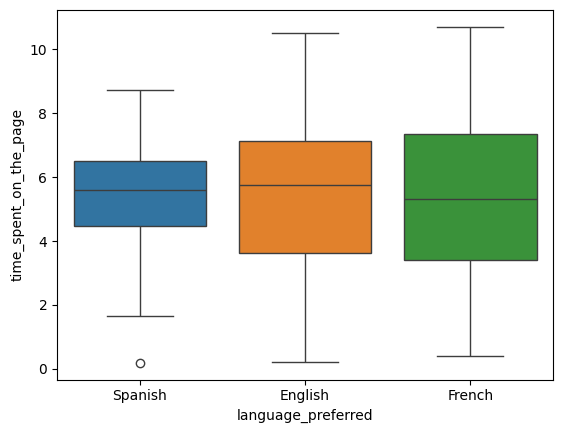

In [51]:
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', hue='language_preferred');

###### Observations:
* According to the graph, the medians are nearly identical across all the languages.

##### Hypothesis Analysis

###### **Step 4.1:** Formulate the null & alternate hypothesis based on above question:

* μ1 or mu1 : Mean time spent by users on the new page for Spanish languages
* μ2 or mu2 : Mean time spent by users on the new page for French languages
* μ3 or mu3 : Mean time spent by users on the new page for English languages


* `Null Hypothesis H0`: **μ1 = μ2 = μ3 : Mean time spent by user on the new page is the same for all preferred language (Spanish, French, and English).**
* `Alternate Hypothesis Ha`: **Atleast one of these means if not the same**

In [52]:
new_page_df = df[df['landing_page'] == 'new']

In [53]:
spent_time_spanish_on_new_page = new_page_df[new_page_df['language_preferred'] == 'Spanish']['time_spent_on_the_page']
spent_time_french_on_new_page = new_page_df[new_page_df['language_preferred'] == 'French']['time_spent_on_the_page']
spent_time_english_on_new_page = new_page_df[new_page_df['language_preferred'] == 'English']['time_spent_on_the_page']

###### **Step 4.2:** Select the appropiate test

Assumptions:
* `More than two indepedent populations`.
* time spend on the new page is `continuous` in nature
* `Population variances are equal`
* The population are normally distributed
* Samples are independent.

We'll use => **One_way_ANOVA F-test**

Equations or Formula:  **`stats.f_oneway(sample1, sample2, sample3, .....)`**


The results from an ANOVA test are most reliable when the assumptions of normality and equality of variances are satisfied.

* For `testing of normality`, **Shapiro-Wilk’s test** is applied to the response variable.

* For `equality of variance`, **Levene test** is applied to the response variable.

###### Testing of Normality : **`Shapiro-Wilk's Test`**

###### **Step I:** Formulate the null & alternate hypothesis for `testing of normality`:

* `Null Hypothesis H0`: **Mean time spent by users on the new page follow a normal distribution**
* `Alternate Hypothesis Ha`: **Mean time spent by users on the new page does not follow a normal distribution**

###### **Step II:** Calculate the p-value for `testing of normality`:

In [54]:
w, p_value = stats.shapiro(new_page_df['time_spent_on_the_page'])
print('p_value:', p_value)

p_value: 0.8040040364746845


###### **Step III:** Inference based on the p-value for `testing of normality`:

In [55]:
if p_value < 0.05:
    print(f'As the p-value {round(p_value,3)} is less than the level of significance({alpha}), we reject the null hypothesis.')
else:
    print(f'As the p-value {round(p_value,3)} is greater than the level of significance({alpha}), we fail to reject the null hypothesis.')

As the p-value 0.804 is greater than the level of significance(0.05), we fail to reject the null hypothesis.


Observations:

* At a 5% of significance level, we **`fail to reject the null hypothesis`**. Hence, we **do not have enough statistical evidence** to say that Mean time spent by users on the new page follow a normal distribution.

###### Equality of Variance : **`Levene's Test`**

###### **Step A:** Formulate the null & alternate hypothesis for `Equality of Variance`:

* `Null Hypothesis H0`: **All the population Variances are equal**
* `Alternate Hypothesis Ha`: **At least one Variance is different from the test**

###### **Step B:** Calculate the p-value for `Equality of Variance`:

In [56]:
test_statistic, p_value = stats.levene(spent_time_spanish_on_new_page, spent_time_french_on_new_page, spent_time_english_on_new_page)
print('test_statistic:', test_statistic)
print('p_value:', p_value)

test_statistic: 0.7736446756800186
p_value: 0.46711357711340173


###### **Step C:** Inference based on the p-value for `Equality of Variance`:

In [57]:
if p_value < 0.05:
    print(f'As the p-value {round(p_value,3)} is less than the level of significance({alpha}), we reject the null hypothesis.')
else:
    print(f'As the p-value {round(p_value,3)} is greater than the level of significance({alpha}), we fail to reject the null hypothesis.')

As the p-value 0.467 is greater than the level of significance(0.05), we fail to reject the null hypothesis.


Observations:

* At a 5% of significance level, we **`fail to reject the null hypothesis`**. Hence, we **do not have enough statistical evidence** to say that all the population Variances are equal.

###### Collect & Prepare data : **`f_oneway ANOVA Test`**

###### **Step 4.3:** Calculate the p-value

In [58]:
test_statistic, p_value = stats.f_oneway(spent_time_spanish_on_new_page, spent_time_french_on_new_page, spent_time_english_on_new_page)
print('test_statistic:', test_statistic)
print('p_value:', p_value)

test_statistic: 0.8543992770006821
p_value: 0.43204138694325955


###### **Step 4.4:** Inference based on the p-value

In [59]:
if p_value < 0.05:
    print(f'As the p-value {round(p_value,3)} is less than the level of significance({alpha}), we reject the null hypothesis.')
else:
    print(f'As the p-value {round(p_value,3)} is greater than the level of significance({alpha}), we fail to reject the null hypothesis.')

As the p-value 0.432 is greater than the level of significance(0.05), we fail to reject the null hypothesis.


Observations:

* At a 5% of significance level, we **`fail to reject the null hypothesis`**. Hence, we **do not have enough statistical evidence** to say that mean time spent by users on the new page differs for different preferred languages (Spanish, French, and English).

## **Conclusions:**

* The **minimum**, **average**, and **maximum** `time_spent_on_the_page` are *0.19 minutes*, *5.38 minutes* and *10.71 minutes* respectively.

* The number of users gets `converted` to a subscriber **more than** `Not Converted` the news portal.

* About `54%` of the users get `converted` the news portal.

* Approximately, 34% of the users preferred `Spanish`,  34% preferred `French` and 32% preferred `English` language.

* Users spent **more time** on  the `new landing page` compared to the `old landing page`.

* As observed, **more** users are converting on the `new landing page` compared to the `old landing page`.

* Users spent more time on the `new landing page` compared to the `old landing page`.

* As observed, users spent more time on the `new landing page` and **converted at a higher rate** compared to the `old landing page`.

* The medians are nearly identical across all the languages.

* It appears that there `may be` `no relationship` between the `converted` and `language_preferred` columns.



## **Recommendations:**

* `Based on 2_sample_independent_t_test`: At a 5% of significance level, we **`reject the null hypothesis`**. Hence, we have **enough statistical evidence** to say that the users spend **`more time`** on `the new landing page` **`than`** on `the existing landing page`. Users prefer the design and content of the new landing page.

* `Based on 2_proportion_sample_z_test`: At a 5% of significance level, we **`reject the null hypothesis`**. Hence, we have **enough statistical evidence** to say that the `proportion` of users who visit the `new landing page` and `get convert` is **greater than** the conversion rate for the `old landing page`. The company should focus more on the new landing page to attract more subscribers.

* `Based on Chi_square_test of independence`: At a 5% of significance level, we **`fail to reject the null hypothesis`**. Hence, we **do not have enough statistical evidence** to say that Converted status and Preferred language are independent. The company should continue publishing in all three languages.


* `Based on One_way_ANOVA F-test`: At a 5% of significance level, we **`fail to reject the null hypothesis`**. Hence, we **do not have enough statistical evidence** to say that mean time spent by users on the new page differs for different preferred languages (Spanish, French, and English). The company should continue publishing in all three languages.






